In [1]:
from qiskit import QuantumCircuit 
from qiskit.quantum_info import Statevector,DensityMatrix,Operator
from qiskit.visualization import plot_bloch_multivector

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
target_state = Statevector.from_label('01')


In [3]:
initial_superposition_sate = Statevector.from_instruction(qc)

In [4]:
grover_oracle = Operator.from_label('II') - 2* DensityMatrix(target_state)

In [5]:
# grover_oracle.draw('latex')


In [6]:
qc.unitary(grover_oracle,[0,1],'Oracle')

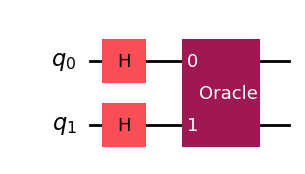

In [7]:
qc.draw('mpl')

In [8]:
grover_diffusion_operator = 2* DensityMatrix(initial_superposition_sate) - Operator.from_label('II')

In [9]:
# grover_diffusion_operator.draw('latex')

In [10]:
qc.unitary(grover_diffusion_operator,[0,1],'Diffusion Operator')

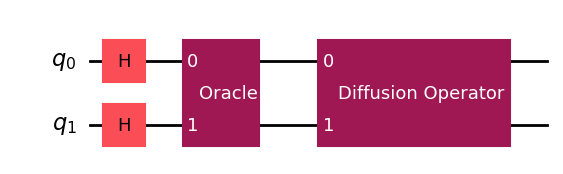

In [11]:
qc.draw('mpl')

In [12]:
from qiskit.primitives import Sampler

In [13]:
qc.measure_all()
sampler = Sampler()
job = sampler.run(qc)
counts = job.result().quasi_dists[0]

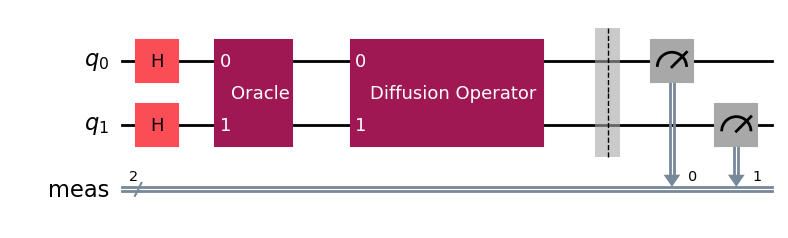

In [14]:
qc.draw('mpl')

In [15]:
def binary_counts(counts:dict,num_qubits:int):
    bindigits = 2 ** num_qubits
    bin_counts = {f"{key:0{num_qubits}b}" : value for key , value in counts.items()}
    return bin_counts

bin_counts = binary_counts(counts,2)

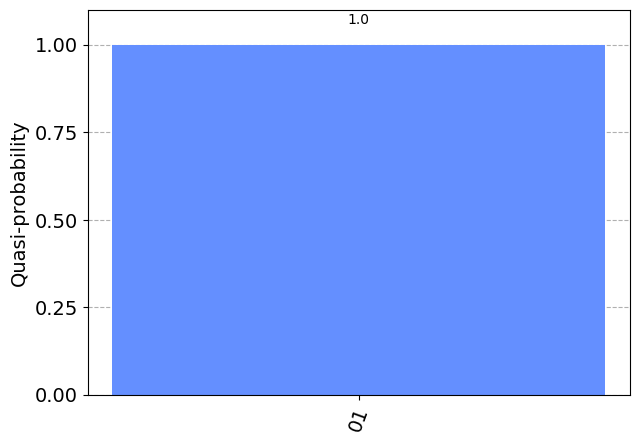

In [16]:
from qiskit.visualization import plot_histogram
plot_histogram(bin_counts)

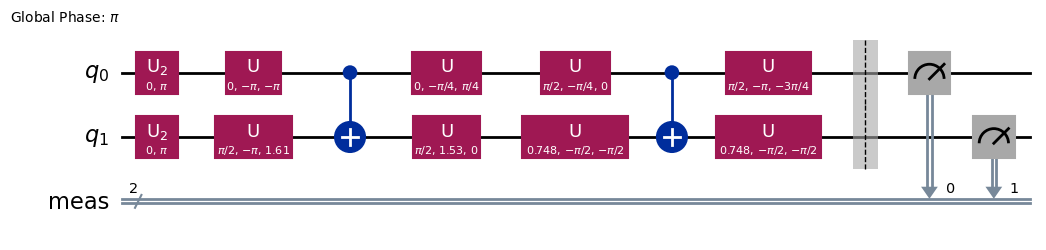

In [18]:
qc.decompose().draw('mpl')

In [19]:
qc.decompose(reps=2).depth()

8

In [21]:
get_counts=qc.decompose(reps=2).count_ops()
cnot_counts = get_counts.get('cx')
cnot_counts

2

In [23]:
get_counts=qc.decompose(reps=2).count_ops()
u_counts = get_counts.get('u')
u_counts

8